# Assignment 3 - Support Vector Machine

## Task 1 - Solving the margin maximization problem
Consider the following simple 1D dataset: <br>
{(0,+1),(6,-1)}. <br>
Determine the exact solution of the margin maximization problem. In order to do that perform the following steps:

## 1.a) Formulate the primal problem

$Z = \{(0,+1), \> (6,-1)\}$

From the original problem:
\begin{equation}
y_i (\vec{w} \cdot \vec{x_i} + b) - 1 \ge 0 \> \text{with} \> y_i \in \{-1, +1\}, \vec{w} \in \mathbb{R}^n
\end{equation}

which has to hold for all $(x_i, y_i) \in Z$.

From that we can derive, that we have to minimize $\frac{1}{2} \big|\big| \vec{w} \big| \big|^2$, without violating the constraint of the original problem above.

This is a quadratic optimization problem with linear constraints:
\begin{equation}
\text{min} \left( \sum_{i=1}^n w_i^2 \right)
\end{equation}

## 1.b) Determine the Lagrange function and the dual problem

Generally the Lagrange function derives as follows:
\begin{equation}
L = (x; \alpha_1, ..., \alpha_2) = f(x) + \sum_{i=1}^n \alpha_i g_i(x)
\end{equation} but in our case:
\begin{equation}
L = (w, b; \alpha_1, ..., \alpha_2) = f(\vec{w}) + \sum_{i=1}^n \alpha_i g_i(w, b)
\end{equation} with
\begin{equation}
f(\vec{w}) = \frac{1}{2} \big|\big| \vec{w} \big| \big|^2
\end{equation} and 
\begin{equation}
g_i(\vec{w}, b) = y_i (\vec{w} \cdot \vec{x_i} + b)  - 1
\end{equation}

We introduce $l$ Lagrange multipliers $\alpha_1, ..., \alpha_l$

Since we have the constraint $g_i(\vec{w}, b) \le 0$ with $i = 1, ..., n$ we have to __maximize__ $g_i$. 

---

We introduce $l$ Lagrange multipliers $\alpha_1, ..., \alpha_l$. Then the Lagrange function is given as: 

\begin{equation}
L(\vec{w}, b; \alpha_1, ..., \alpha_l) = \\
\frac{1}{2} \big| \big| \vec{w} \big| \big|^2 - \sum_{i=1}^l \alpha_i ( y_i \left( \vec{w} \cdot \vec{x_i} + b \right) - 1 ) = \\
\frac{1}{2} \big| \big| \vec{w} \big| \big|^2  - \vec{w} \cdot \sum_{i=1}^l \alpha_i y_i \vec{x_i} - b \cdot \sum_{i=1}^l \alpha_i y_i + \sum_{i=1}^l \alpha_i
\end{equation}

---

Solving the dual problem includes minimizing $L$ with respect to $w$
and $b$ (for fixed Lagrange multipliers).

\begin{equation}
\frac{\delta L}{\delta \vec{w}}(\vec{w}, b; \alpha_1, ... \alpha_l) = 0 \\
\vec{w} = \sum_{i=1}^l \alpha_i y_i x_i
\end{equation}
\begin{equation} \label{dual}
\frac{\delta L}{\delta b}(\vec{w}, b; \alpha_1, ... \alpha_l) = 0 \\
\sum_{i=1}^l \alpha_i y_i = 0
\end{equation}

## 1.c) Solve the dual problem

From that we can derive the dual problem:

\begin{equation}
\mathcal{L}(\alpha_1, ..., \alpha_l) = \left( \sum_{i=1}^l \alpha_i \right) - \frac{1}{2} \sum_{i=1}^l \sum_{j=1}^l \alpha_i \alpha_j y_i y_j \vec{x_i} \cdot \vec{x_j}
\end{equation}

---

From 
\begin{equation}
\sum_{i=1}^l \alpha_i y_i = 0 \\
\alpha_1 \cdot 1 + \alpha_2 \cdot -1 = 0 \iff \alpha_1 = \alpha2
\end{equation}

Then we can fill into the dual problem: 
\begin{equation}
\mathcal{L}(\alpha_1, ..., \alpha_l) = \alpha_1 + \alpha_2 - \frac{1}{2} \cdot \big( \\
\alpha_1 \cdot \alpha_1 \cdot 1 \cdot 1 \cdot \textbf{0} \cdot \textbf{0} + \\
\alpha_1 \cdot \alpha_2 \cdot 1 \cdot -1 \cdot \textbf{0} \cdot 6 + \\
\alpha_2 \cdot \alpha_1 \cdot -1 \cdot 1 \cdot 6 \cdot \textbf{0} + \\
\alpha_2 \cdot \alpha_2 \cdot -1 \cdot -1 \cdot 6 \cdot 6 \big)
\end{equation} and simplify to:
\begin{equation}
\mathcal{L}(\alpha_1, ..., \alpha_l) = \alpha_1 + \alpha_2 - \frac{1}{2} \cdot \alpha_2 \cdot \alpha_2 \cdot -1 \cdot -1 \cdot 6 \cdot 6 \\
\mathcal{L}(\alpha_1, ..., \alpha_l) = 2\alpha_2 - \frac{1}{2} 36\alpha_2^2
\end{equation} by deriving for the maximum we get:
\begin{equation}
\frac{\delta \mathcal{L}(\alpha_1, ..., \alpha_l)}{\delta \alpha_2} = 2 - 36\alpha_2 \iff \alpha_2 = \frac{1}{18} \implies \alpha_1 = \frac{1}{18}
\end{equation}

## 1.d) Determine ($\vec{w},b$) from the solution of the dual problem

Filling into
\begin{equation}
\vec{w} = \sum_{i=1}^l \alpha_i y_i x_i
\end{equation} we get
\begin{equation}
\vec{w} = \left( \frac{1}{18} \cdot 1 \cdot 0 \right) + \left( \frac{1}{18} \cdot -1 \cdot 6 \right) \\
\vec{w} = \frac{1}{18} \cdot -1 \cdot 6 = - \frac{1}{3}
\end{equation}

---

Now we can solve $g_i(\vec{w}, b)$
\begin{equation}
g_i(\vec{w}, b) = y_i (\vec{w} \cdot \vec{x_i} + b) - 1
\end{equation}
For $g_1(\vec{w}, b)$
\begin{equation}
g_1(-\frac{1}{3}, b) = y_1 (-\frac{1}{3} \cdot \vec{x_i} + b) - 1 \\
y_1 (-\frac{1}{3} \cdot \vec{x_i} + b) - 1 = 0 \\
1 (-\frac{1}{3} \cdot 0 + b) - 1 = 0 \implies b = 1
\end{equation}
Double-check with $g_2(\vec{w}, b)$
\begin{equation}
g_2(-\frac{1}{3}, b) = y_2 (-\frac{1}{3} \cdot \vec{x_i} + b) - 1 \\
y_2 (-\frac{1}{3} \cdot \vec{x_i} + b) - 1 = 0 \\
-1 (-\frac{1}{3} \cdot 6 + b) - 1 = 0 \implies b = 1
\end{equation}

---

$\vec{w} = -\frac{1}{3},\; b = 1$

## Task 2 - Implementing a C-SVM with RBF kernel
Take the noise-distorted dataset from Assignment 1 (`Dataset1.csv` + noise as provided below).

Apply a C-SVM with RBF kernel for classification. In order to find the best performance apply a 2D gridsearch for the parameters C and $\gamma$ (as presented in the exercise, slide 13 and 14). Take as parameter range for the grid search $\gamma= 0.1, \ldots, 1$ and $C= 0, \ldots, 1000.$ Use a 10-fold cross validation for finding the best parameters. Display your results and compare to the results from Assignment 1. What's the difference between the kNN performance and the SVM performance. Is this expected? Choose one good pair and one bad pair of parameters for your C-SVM. Visualize the ROC-Curve for both. Give an explanation of what you see and discuss the results. Make sure you answer all the questions!

Use the function `svm.SVC` provided by sklearn for fitting and the function `roc_curve` from `sklearn.metrics`

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet1.csv', delimiter=',')
X, y = Z[:, :-1], Z[:, -1]

# create a noise-distorted dataset frame with 4 additional random distributed columns
np.random.seed(seed=1234)
r = np.random.rand(X.shape[0], 4)
X_new = np.hstack((X, r))

---

In [3]:
# method for evaluating kNN classifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier as KNN


def evaluate_kNN(X: np.ndarray, y: np.ndarray, k: int, n_neighbors: int) -> float:
    error = []
    for train, test in KFold(k).split(X, y):
        knn = KNN(n_neighbors).fit(X[train], y[train])
        error.append(np.mean(knn.predict(X[test]) != y[test]))
    return np.mean(error)

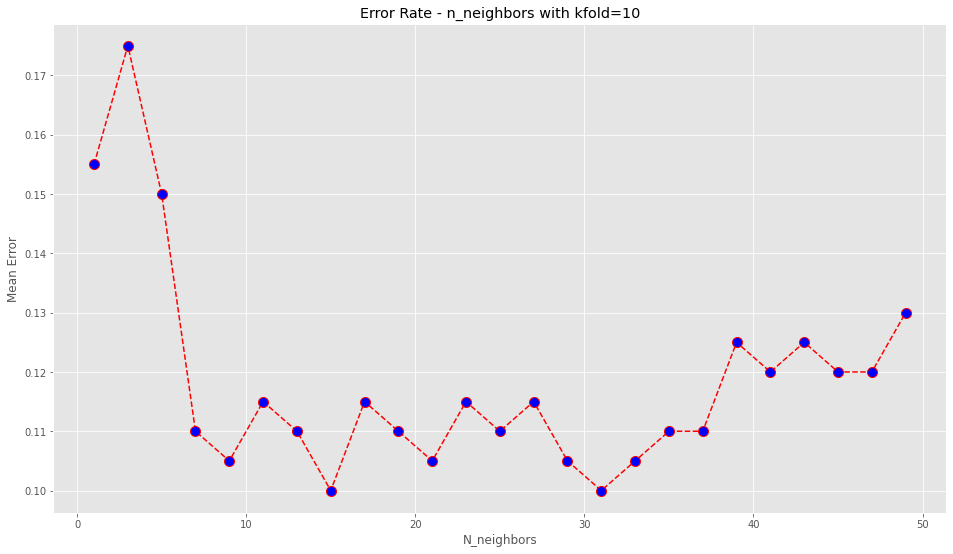

In [4]:
# kNN as function of neighbors
error_n = [evaluate_kNN(X_new, y, 10, n) for n in range(1, 50, 2)]

plt.figure(figsize=(16, 9))
plt.plot(
    range(1, 50, 2),
    error_n,
    color='red',
    linestyle='dashed',
    marker='o',
    markerfacecolor='blue',
    markersize=10
)
plt.title('Error Rate - n_neighbors with kfold=10')
plt.xlabel('N_neighbors')
plt.ylabel('Mean Error')
plt.show()

---

## Own implementation

In [5]:
from math import ceil

from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc


def evaluate_svc(X: np.ndarray, y: np.ndarray, k: int, c: float, g: float):
    error = []
    for train, test in KFold(k).split(X, y):
        svm = SVC(C=c, gamma=g).fit(X[train], y[train])
        error.append(np.mean(svm.predict(X[test]) != y[test]))
    return np.mean(error)


def grid_search(X: np.ndarray,
                y: np.ndarray,
                gamma_min: float,
                gamma_max: float,
                gamma_step: float,
                C_min: float,
                C_max: float,
                C_step: float,
                kfold: int = 5):
    def get_count(mi, ma, stepwidth):
        return ceil((ma - mi) / stepwidth) + 1

    C = get_count(C_min, C_max, C_step)
    Clin = np.linspace(C_min, C_max, C)
    
    G = get_count(gamma_min, gamma_max, gamma_step)
    Glin = np.linspace(gamma_min, gamma_max, G)

    matrix = np.zeros((G, C))
    best = {'gamma': 0, 'C': 0, 'err': 1}
    worst = {'gamma': 0, 'C': 0, 'err': 0}

    for m, g in enumerate(Glin):
        for n, c in enumerate(Clin):
            mean_error = evaluate_svc(X, y, kfold, c, g)
            if (mean_error < best['err']):
                best = {'gamma': g, 'C': c, 'err': mean_error}
            if (mean_error > worst['err']):
                worst = {'gamma': g, 'C': c, 'err': mean_error}
            matrix[m, n] = mean_error
    
    return matrix, best, worst

In [6]:
from sklearn.model_selection import train_test_split

# Perform the grid search on 80% of the entire data
# Keep 20% of it as test data to test the best parameters
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=645)

data, best, worst = grid_search(
    X_train, y_train, 0.1, 1, .05, 1, 1000, 25)

Print found data to get a better visualize it: 

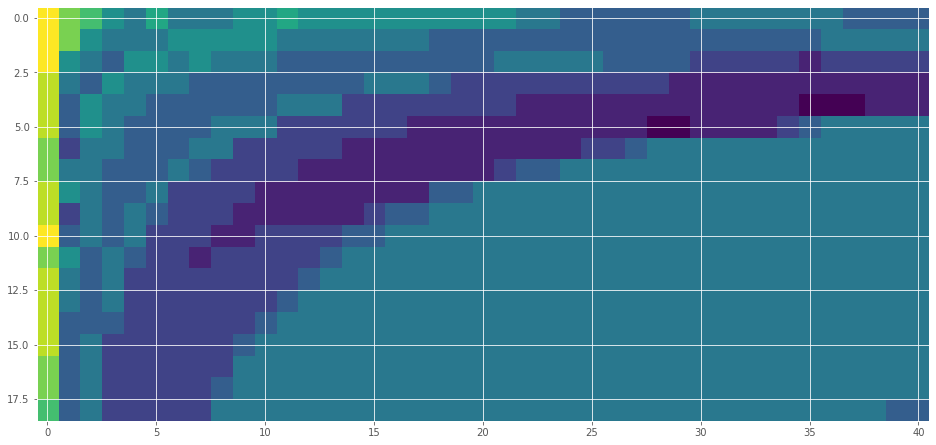

In [7]:
plt.figure(figsize=(16, 9))
plt.imshow(data)
plt.show()

## Textual Answers

### What's the difference between the `kNN`-performance and the `SVM`-performance. Is this expected?
On average the __worst__ `SVM`-results are comparable to the __best__ `kNN`-results (tried with multiple seeds). It is expected because the `kNN`-classifier __CAN NOT__ deal with introduced noise that well. The `SVM`-performance (see table) yields better results for almost all parametrizations. 

This is somewhat expected since `kNN`-classification is a very naïve approach and the `SVM`-mapping can better circumvent the random noise.

### Choose one good pair and one bad pair of parameters for your `C-SVM`. Visualize the `ROC`-Curve for both. Give an explanation of what you see and discuss the results.

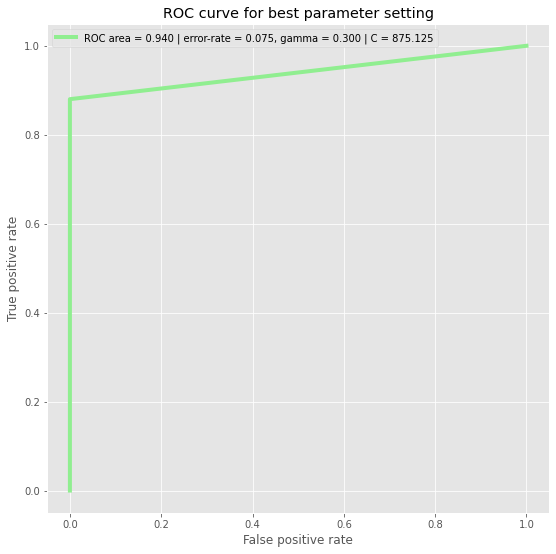

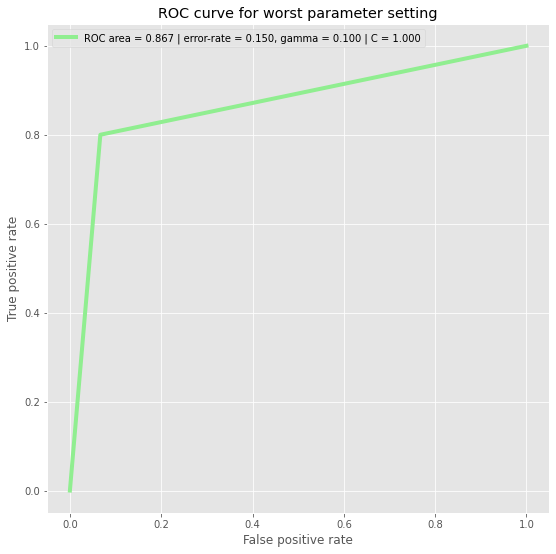

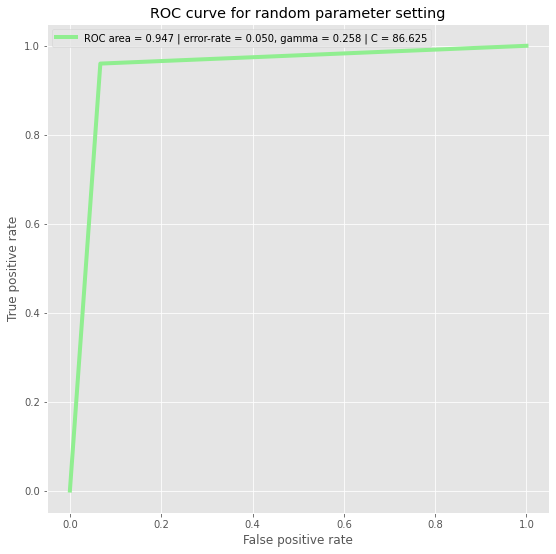

In [8]:
from random import uniform


def plot_paramsetting(parametrization, name):
    svm = SVC(C=parametrization['C'], gamma=parametrization['gamma']).fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.figure(figsize=(9, 9))
    plt.plot(fpr, tpr, linewidth=4, color='lightgreen')
    plt.title(f'ROC curve for {name} parameter setting')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend([
        'ROC area = {:.3f} | error-rate = {:.3f}, gamma = {:.3f} | C = {:.3f}'.
        format(
            auc(fpr, tpr), np.mean(y_pred != y_test), parametrization['gamma'],
            parametrization['C'])
    ])
    plt.show()


plot_paramsetting(best, 'best')
plot_paramsetting(worst, 'worst')
plot_paramsetting({
    'gamma': uniform(0.1, 1),
    'C': uniform(1, 1000)
}, 'random')

We can observe that the _best_ parameter setting yields almost 'perfect' results with error rates averaging around 3%. The _worst_ parameter setting yields similar results as the `kNN`-classification (for `k>11`). 

The additional _random_ parameter setting still yields very good results on average - better than `kNN`-classification for any `k`.